In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pickle
from tqdm import tqdm
mpl.rcParams['figure.dpi']= 200

In [5]:
data = pd.read_csv("Breast_GSE70947.csv")
data = data.to_numpy()
y = data[:,1]
y = 1 * (y == 'normal')
X = data[:,2:]
# splitting the data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)

In [6]:
# checking the sets are balanced (so checking proportions of each class)
np.unique(y_train, return_counts=True)[1]/y_train.shape[0]
np.unique(y_test, return_counts=True)[1]/y_test.shape[0]
# compare against original dataset proportions
np.unique(y, return_counts=True)[1]/y.shape[0]

array([0.49480969, 0.50519031])

## Random Forest Classifier

In [31]:
# on a bunch of models, first do 5-fold CV, then choose "best" one, finally test model on test data
depths = np.int64(np.linspace(1, 50, 25, endpoint=True))

cv_scores = []

for depth in tqdm(depths):
    rfc = RandomForestClassifier(max_depth=depth, n_estimators=15, max_features=1, bootstrap=True, random_state=0) # check what random state's for
    score = np.mean(cross_val_score(rfc, X_train, y_train, cv=5))
    print("depth " + str(depth) + ": " + str(score))
    cv_scores = cv_scores + [score]

    if depth == depths[-1]:
        pickle.dump(rfc, open("rf_model", "wb"))

  4%|▍         | 1/25 [00:02<00:59,  2.46s/it]

depth 1: 0.7312896405919662


  8%|▊         | 2/25 [00:04<00:52,  2.27s/it]

depth 3: 0.7543340380549683


 12%|█▏        | 3/25 [00:06<00:49,  2.24s/it]

depth 5: 0.7686046511627908


 16%|█▌        | 4/25 [00:08<00:46,  2.21s/it]

depth 7: 0.7591966173361522


 20%|██        | 5/25 [00:11<00:43,  2.20s/it]

depth 9: 0.7683932346723045


 24%|██▍       | 6/25 [00:13<00:41,  2.18s/it]

depth 11: 0.7635306553911205


 28%|██▊       | 7/25 [00:15<00:39,  2.19s/it]

depth 13: 0.7588794926004228


 32%|███▏      | 8/25 [00:17<00:37,  2.20s/it]

depth 15: 0.7774841437632135


 36%|███▌      | 9/25 [00:19<00:35,  2.19s/it]

depth 17: 0.7774841437632135


 40%|████      | 10/25 [00:22<00:32,  2.20s/it]

depth 19: 0.7774841437632135


 44%|████▍     | 11/25 [00:24<00:30,  2.20s/it]

depth 21: 0.7774841437632135


 48%|████▊     | 12/25 [00:26<00:28,  2.19s/it]

depth 23: 0.7774841437632135


 52%|█████▏    | 13/25 [00:28<00:26,  2.18s/it]

depth 25: 0.7774841437632135


 56%|█████▌    | 14/25 [00:30<00:24,  2.19s/it]

depth 27: 0.7774841437632135


 60%|██████    | 15/25 [00:33<00:21,  2.19s/it]

depth 29: 0.7774841437632135


 64%|██████▍   | 16/25 [00:35<00:19,  2.18s/it]

depth 31: 0.7774841437632135


 68%|██████▊   | 17/25 [00:37<00:17,  2.18s/it]

depth 33: 0.7774841437632135


 72%|███████▏  | 18/25 [00:39<00:15,  2.18s/it]

depth 35: 0.7774841437632135


 76%|███████▌  | 19/25 [00:41<00:13,  2.17s/it]

depth 37: 0.7774841437632135


 80%|████████  | 20/25 [00:43<00:10,  2.16s/it]

depth 39: 0.7774841437632135


 84%|████████▍ | 21/25 [00:46<00:08,  2.17s/it]

depth 41: 0.7774841437632135


 88%|████████▊ | 22/25 [00:48<00:06,  2.17s/it]

depth 43: 0.7774841437632135


 92%|█████████▏| 23/25 [00:50<00:04,  2.17s/it]

depth 45: 0.7774841437632135


 96%|█████████▌| 24/25 [00:52<00:02,  2.17s/it]

depth 47: 0.7774841437632135


100%|██████████| 25/25 [00:54<00:00,  2.19s/it]

depth 50: 0.7774841437632135


In [41]:
#  now we try on test data
loaded_model = pickle.load(open("rf_model", "rb"))
loaded_model.fit(X_train, y_train)
loaded_model.score(X_test, y_test)

0.821917808219178

Text(0.5, 1.0, 'Determining RF depth via CV')

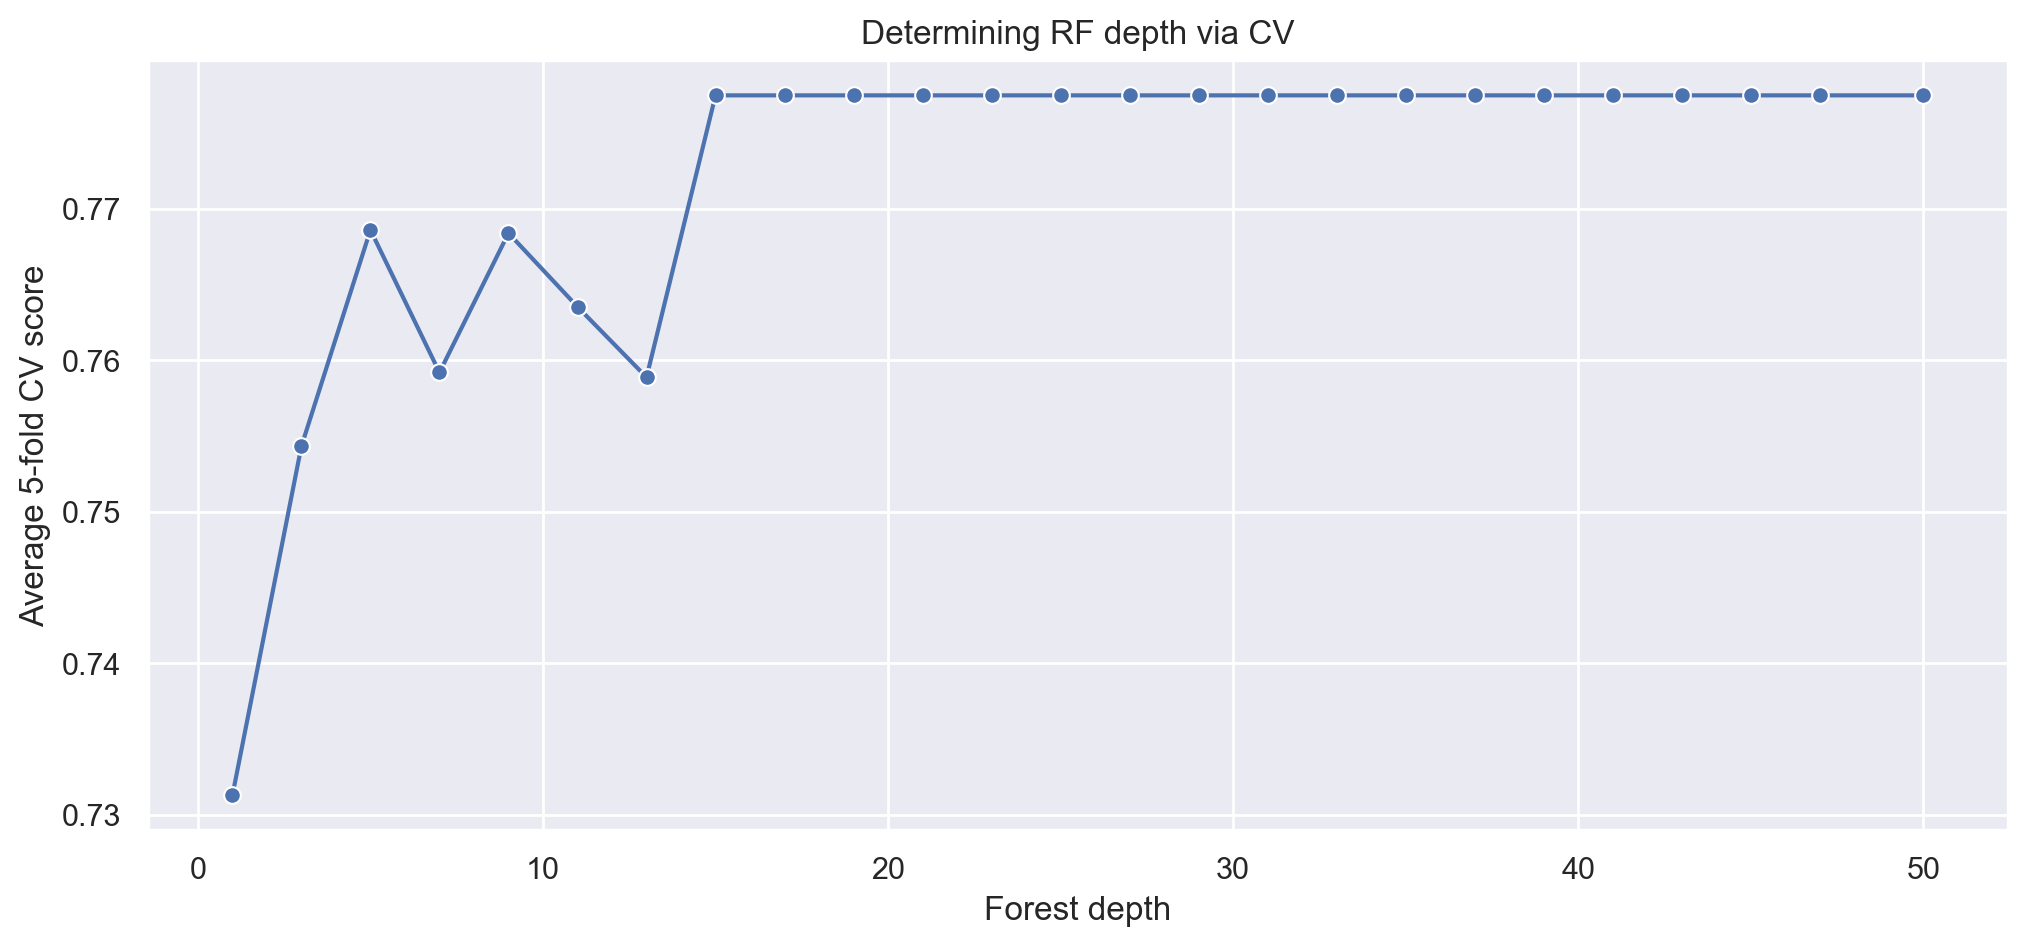

In [57]:
sns.set(rc={"figure.figsize":(12,5)})
sns.lineplot(x=depths,y=cv_scores, marker="o")
plt.xlabel("Forest depth")
plt.ylabel("Average 5-fold CV score")
plt.title("Determining RF depth via CV")